In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy import stats

In [2]:
import seaborn as sns
sns.set(
    font_scale=2, 
    style="whitegrid", 
    rc={'figure.figsize': (20, 7)}
)

1.1 Изучим данные

In [3]:
users_test = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/L8HxRYDn2l4h9A',
    delimiter=";"
)
users_control_1 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/TxOD_JxnkMd4mA',
    delimiter=";"
)
users_control_2 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/YT6OWRK2cTWfLg',
    delimiter=";"
)

In [4]:
transactions_test = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/3viYBnm7cyihkQ',
    delimiter=";",
    parse_dates=["joined_at", "paid_at"],
)
transactions_control_1 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/84jzzJeQ4tqVyg',
    delimiter=";",
    parse_dates=["joined_at", "paid_at"],
)
transactions_control_2 = pd.read_csv(
    'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/_pOo7mrDCZZMyA',
    delimiter=";",
    parse_dates=["joined_at", "paid_at"],
)

In [5]:
users_test['test'] = 'test'
users_control_1['test'] = 'control1'
users_control_2['test'] = 'control2'

In [6]:
transactions_test['test'] = 'test'
transactions_control_1['test'] = 'control1'
transactions_control_2['test'] = 'control2'

In [7]:
users = pd.concat([users_test, users_control_1, users_control_2])

In [8]:
transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2])

In [9]:
transactions.describe()

,uid,revenue,payment_id
count,9.780000e+02,978.000000,978.000000
mean,8.920309e+08,7032.361963,94.592025
std,3.843685e+06,8655.787235,57.930448
min,8.910681e+08,26.000000,0.000000
25%,8.914837e+08,2577.250000,19.000000
50%,8.918626e+08,5804.500000,146.000000
75%,8.921428e+08,9087.000000,147.000000
max,9.609370e+08,113477.000000,147.000000


In [10]:
transactions['uid'] = transactions.uid.fillna(0).astype('int')

In [11]:
transactions.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                float64
payment_id             float64
from_page               object
product_type            object
test                    object
dtype: object

In [12]:
transactions['paid_at'] = pd.to_datetime(transactions['paid_at'])

In [13]:
users.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,1.291200e+04,12912.000000,12912.000000,170.000000,12912.000000,12912.000000,12912.000000,12912.000000,1255.0,540.0,12912.000000
mean,8.917569e+08,32.010378,315.455545,688.958824,0.955158,26.815985,38.568463,46.641032,1.0,1.0,526.837283
std,1.610285e+06,10.224415,323.488766,7690.943033,0.206965,9.447197,15.511204,285.324194,0.0,0.0,5524.662716
min,8.910509e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913565e+08,25.000000,0.000000,6.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917255e+08,30.000000,250.000000,10.000000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920860e+08,38.000000,529.000000,28.000000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,1.053059e+09,99.000000,1000.000000,99958.000000,1.000000,96.000000,102.000000,16157.000000,1.0,1.0,486330.000000


In [14]:
users.total_revenue.sum()

6802523

In [15]:
users.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
test                 object
dtype: object

In [16]:
transactions.isna().sum()

uid               0
country         630
joined_at       630
paid_at         630
revenue         630
payment_id      630
from_page       630
product_type    630
test              0
dtype: int64

In [17]:
users.isna().sum()

uid                     0
age                     0
attraction_coeff        0
coins               12742
country                 0
visit_days           4018
gender                  0
age_filter_start        0
age_filter_end          0
views_count             0
was_premium         11657
is_premium          12372
total_revenue           0
test                    0
dtype: int64

In [18]:
df = users.merge(transactions.drop(columns=['country']), how='left', on='uid')
df = df.fillna(0)

In [19]:
# посмотрим, нет ли наблюдений, которые попали одновременно в тестовую и контрольную группу

In [20]:
users.query('test == "test" & test == "control1"').uid.count()

0

In [21]:
users.query('test == "test" & test == "control2"').uid.count()

0

In [22]:
users.query('test == "control1" & test == "control2"').uid.count()

0

In [23]:
transactions.query('test == "test" & test == "control1"').uid.count()

0

In [24]:
transactions.query('test == "control2" & test == "control1"').uid.count()

0

In [25]:
transactions.query('test == "test" & test == "control2"').uid.count()

0

In [26]:
df.query('test_x == "test" & test_x == "control1"').uid.count()

0

In [27]:
df.query('test_x == "control2" & test_x == "control1"').uid.count()

0

In [28]:
df.query('test_x == "test" & test_x == "control2"').uid.count()

0

Итак, знаем, что решено было повысить стоимость премиум-подписки в 2 платежных системах и нескольких странах. Выделим их среди данных

In [29]:
# посмотрим, в каких платежных системах повысились медианные чеки

In [30]:
transactions_vis = transactions.query('product_type == "premium_no_trial"') \
    .groupby(['test', 'payment_id'], as_index=False).agg({'revenue': 'median'})

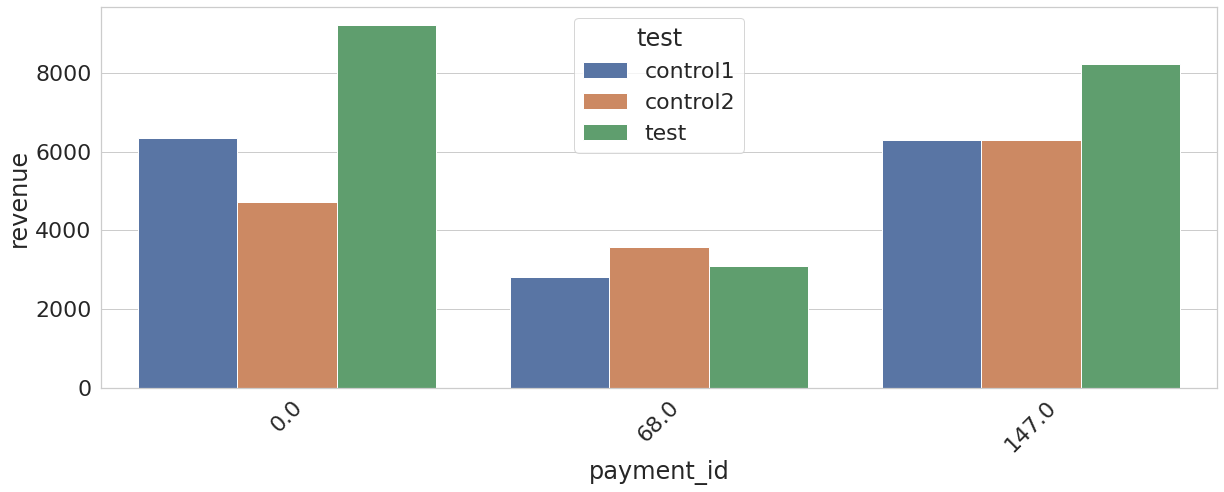

In [31]:
sns.barplot(x="payment_id", y="revenue", hue="test", data=transactions_vis)
plt.xticks(rotation=45)
plt.show()
# 0.0, 147.0 - две платежные системы, пользователи которых оплатили увеличенную подписку

In [32]:
# посмотрим, в каких странах повысились чеки

In [33]:
transactions_vis2 = transactions.query('product_type == "premium_no_trial"') \
    .groupby(['test', 'country'], as_index=False).agg({'revenue': 'median'})

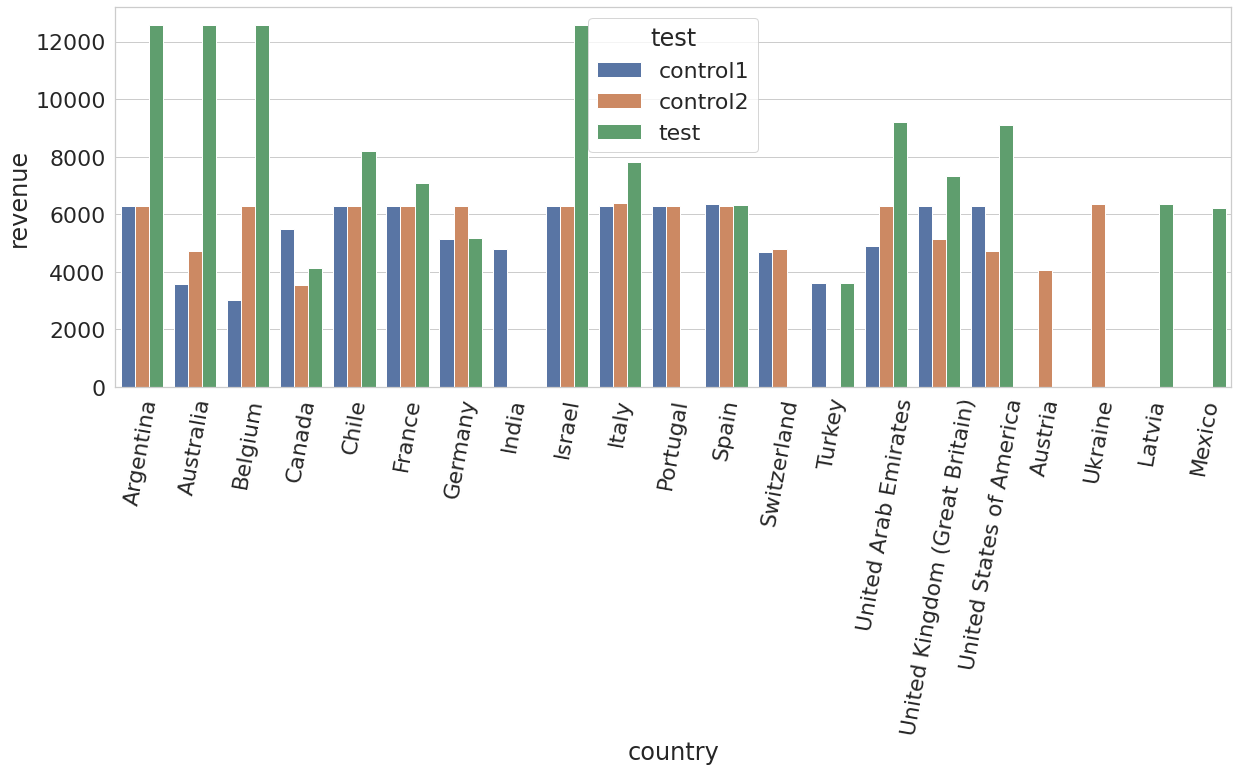

In [34]:
sns.barplot(x="country", y="revenue", hue="test", data=transactions_vis2)
plt.xticks(rotation=80)
plt.show()
# Аргентина, Австралия, Бельгия, Чили, Франция, Израиль, Италия, ОАЭ, Британия, США

In [35]:
transactions.paid_at.min()

Timestamp('2016-12-14 16:16:00')

In [36]:
transactions.paid_at.max()

Timestamp('2017-12-11 23:28:00')

In [37]:
transactions.query('test == "test"').paid_at.min()

Timestamp('2017-01-11 04:37:00')

In [38]:
transactions.query('test == "test"').paid_at.max()

Timestamp('2017-12-11 22:06:00')

In [39]:
transactions.query('test == "test"').paid_at.max() - transactions.query('test == "test"').paid_at.min()

Timedelta('334 days 17:29:00')

In [40]:
transactions.paid_at.max() - transactions.paid_at.min()

Timedelta('362 days 07:12:00')

In [41]:
# тест проводили с 11 января по 11 декабря 2017 года, данные по остальным группам - с декабря 2016

Подготовим данные для анализа - отфильтруем страны и платежные системы, на которых проводились тесты

In [42]:
df = df.query('payment_id == 0.0 or payment_id == 147.0') 
df = df.query('country in ["Argentina", "Australia", "Belgium", "Chile", "France", "Israel", "Italy", \
              "United Arab Emirates", "United Kingdom (Great Britain)", "United States of America"]')

In [43]:
transactions = transactions.query('payment_id == 0.0 or payment_id == 147.0')
transactions = transactions.query('country in ["Argentina", "Australia", "Belgium", "Chile", "France", \
                                  "Israel", "Italy", "United Arab Emirates", "United Kingdom (Great Britain)", \
                                  "United States of America"]')

In [44]:
users = users.query('country in ["Argentina","Australia", "Belgium", "Chile", "France", "Israel", \
                    "Italy", "United Arab Emirates", "United Kingdom (Great Britain)", "United States of America"]')

In [45]:
df_country = df.groupby(['test_x', 'country'], as_index=False) \
    .agg({'total_revenue': 'sum', 'uid': 'nunique'}).rename(columns={'uid': 'user_counts'})

In [46]:
df_country['arpu'] = df_country.total_revenue / df_country.user_counts
# считаем ARPU

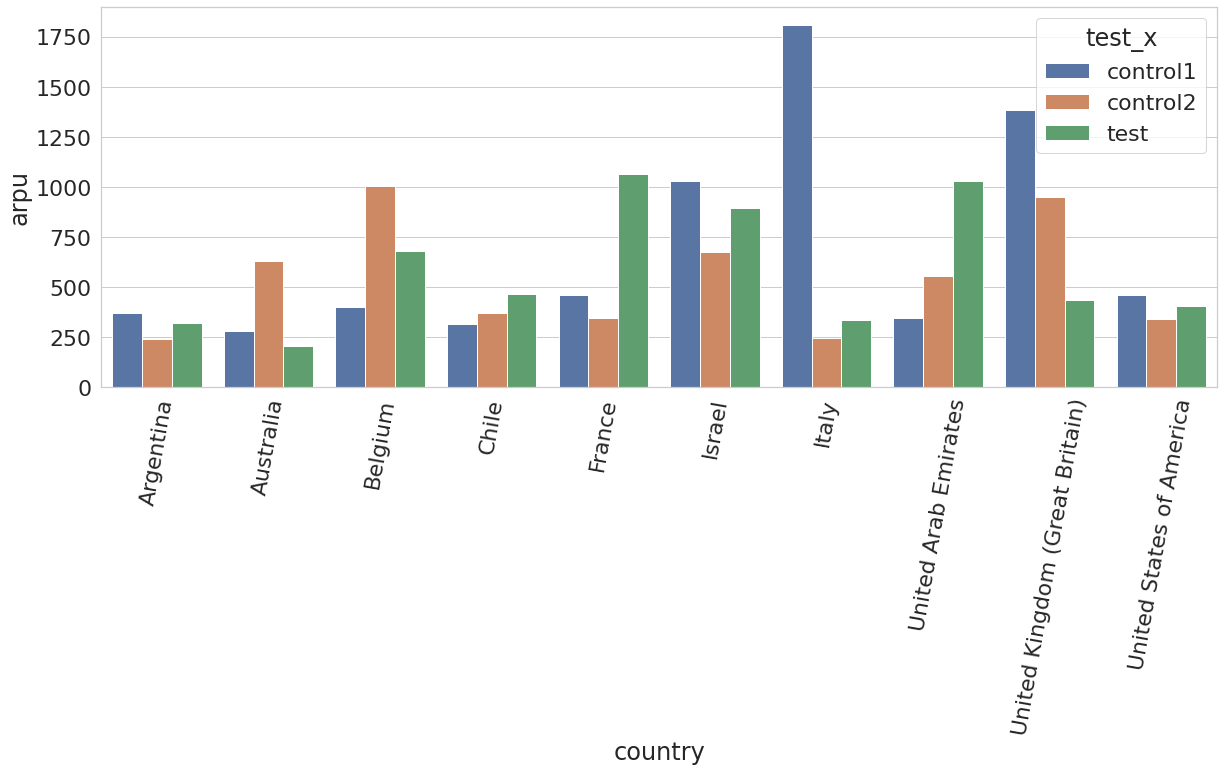

In [47]:
sns.barplot(x="country", y="arpu", hue="test_x", data=df_country)
plt.xticks(rotation=80)
plt.show()
# уберем Британию и Италию - явно какие-то выбросы

In [48]:
df_country = df_country.query('country not in ["Italy", "United Kingdom (Great Britain)"]')

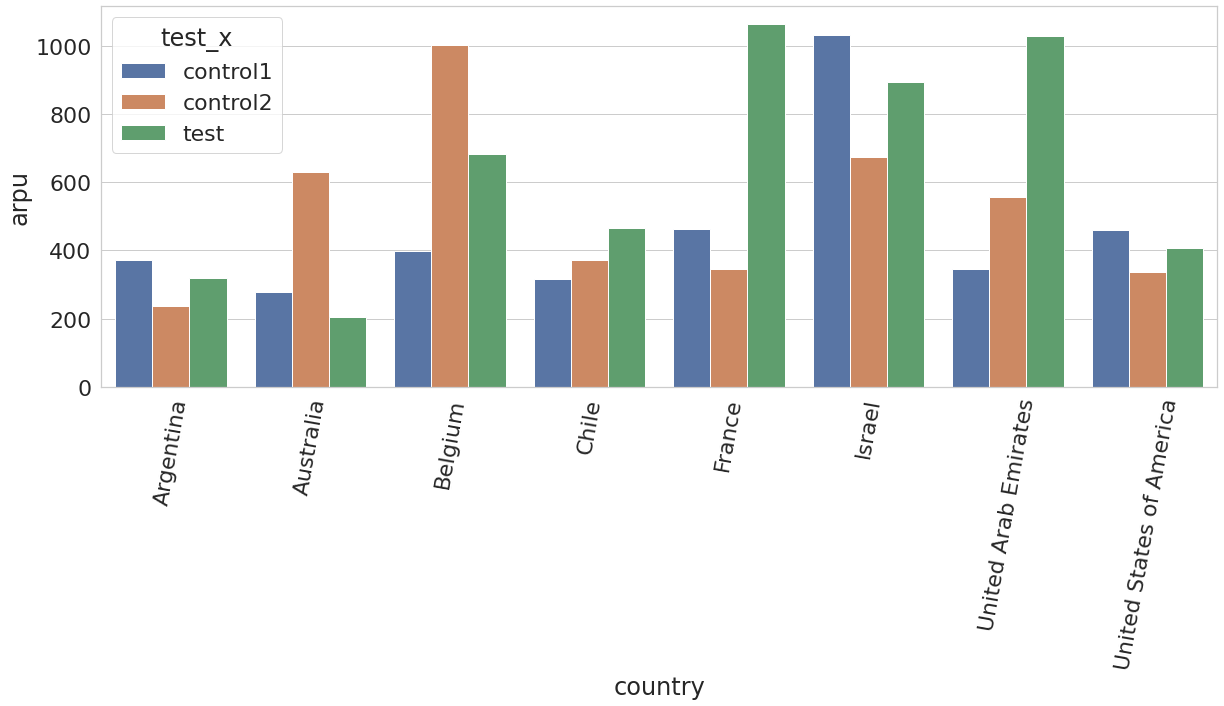

In [49]:
sns.barplot(x="country", y="arpu", hue="test_x", data=df_country)
plt.xticks(rotation=80)
plt.show()
# уберем Британию и Италию - явно какие-то выбросы

In [50]:
df = df.query('country not in ["Italy", "United Kingdom (Great Britain)"]')

In [51]:
transactions = transactions.query('country not in ["Italy", "United Kingdom (Great Britain)"]')

In [52]:
users = users.query('country not in ["Italy", "United Kingdom (Great Britain)"]')

1.2. Посмотрим на изменения - считаем ARPU; проверим конверсии в покупку премиум подписки; выясним, не склонны ли пользователи уходить из-за повышения цены (retention)

In [53]:
arpu = df.groupby('test_x') \
    .total_revenue.sum() / df.groupby('test_x').uid.nunique()
arpu

test_x
control1    441.517544
control2    377.573854
test        549.549864
dtype: float64

In [54]:
(1722.405670 - 1020.441324) / 1020.441324 * 100

68.79027039481204

In [55]:
(1722.405670 - 889.103866) / 889.103866 * 100

93.72378592266745

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

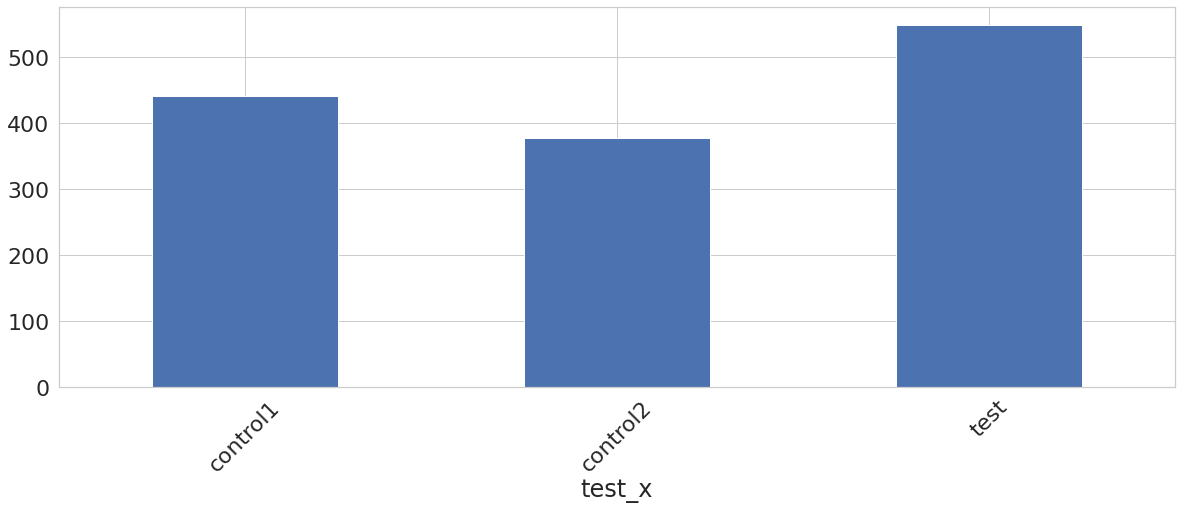

In [56]:
arpu.plot.bar()
plt.xticks(rotation=45)

In [57]:
# в тестовой группе ARPU выше, чем в control2 и в control1

In [58]:
# проверим конверсию в покупку премиума

In [59]:
users.query('test == "test"') \
    .is_premium.sum() / users.query('test == "test"').uid.count() * 100

3.644954438069524

In [60]:
users.query('test == "control1"') \
    .is_premium.sum() / users.query('test == "control1"').uid.count() * 100

4.446673353393514

In [61]:
users.query('test == "control2"') \
    .is_premium.sum() / users.query('test == "control2"').uid.count() * 100

4.336134453781513

In [62]:
# конверсия в премиум снизилась на ~0,7 процентных пунктов. Посмотрим повлияло ли повышение цены на показатель retenrion

In [63]:
df['last_day'] = df.visit_days.str.split(',').str[-1].fillna(0).astype('int')

In [64]:
df.groupby(['test_x'], as_index=False).uid.nunique()

,test_x,uid
0,control1,2964
1,control2,2945
2,test,2948


In [65]:
# последний день визита пользователей тестовой группы, %
test_ret = df.query('payment_id == 0.0 or payment_id == 147.0' and 'test_x == "test"') \
    .groupby(['test_x', 'last_day'], as_index=False) \
    .uid.nunique().sort_values(by='last_day').uid
test_ret

0     953
1     371
2     213
3     130
4     141
5     128
6      98
7      95
8      94
9      91
10     86
11     43
12     39
13     34
14     43
15     40
16     34
17     49
18     17
19     29
20     28
21     22
22     23
23     19
24     22
25     18
26     25
27     11
28     19
29      9
30      9
31     15
Name: uid, dtype: int64

In [66]:
# последний день визита пользователей 1 контрольной группы, %
control1_ret = df.query('payment_id == 0.0 or payment_id == 147.0' and 'test_x == "control1"') \
    .groupby(['test_x', 'last_day'], as_index=False) \
    .uid.nunique().sort_values(by='last_day').uid
control1_ret

0     924
1     415
2     213
3     140
4     128
5     113
6     112
7      87
8      84
9      82
10     76
11     56
12     43
13     32
14     35
15     47
16     42
17     32
18     21
19     32
20     25
21     36
22     27
23     17
24     23
25     25
26     19
27     23
28     12
29     20
30     10
31     13
Name: uid, dtype: int64

In [67]:
# последний день визита пользователей 2 контрольной группы, %
control2_ret = df.query('payment_id == 0.0 or payment_id == 147.0' and 'test_x == "control2"') \
    .groupby(['test_x', 'last_day'], as_index=False) \
    .uid.nunique().sort_values(by='last_day').uid
control2_ret

0     1003
1      404
2      199
3      150
4      115
5      108
6       89
7       82
8       95
9       91
10      73
11      47
12      34
13      41
14      41
15      31
16      41
17      32
18      38
19      20
20      13
21      22
22      23
23      19
24      19
25      20
26      14
27      17
28      12
29      11
30      19
31      22
Name: uid, dtype: int64

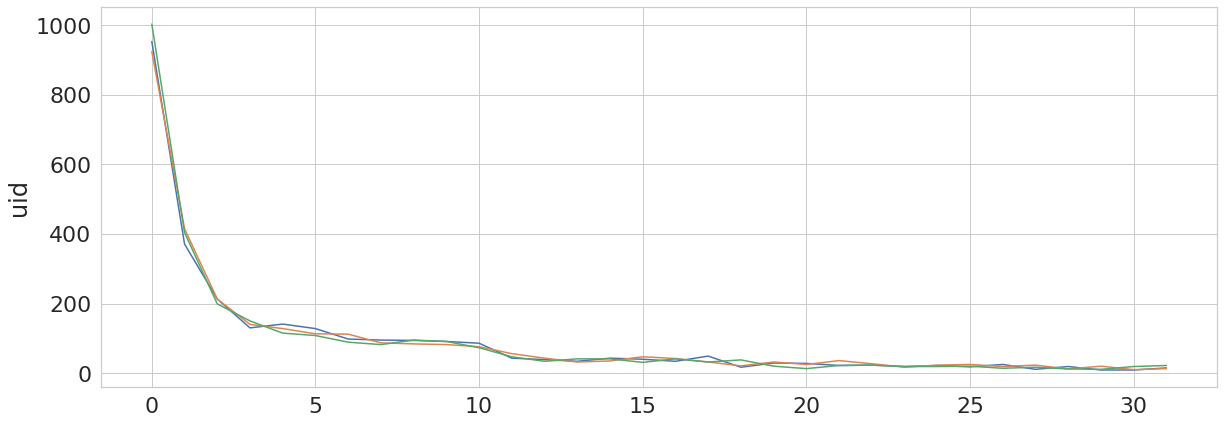

In [68]:
# картина примерно одинакова по всем группам, посмотрим на графике
sns.lineplot(data=test_ret)
sns.lineplot(data=control1_ret)
sns.lineplot(data=control2_ret)

Посмотрим, сколько пользователей были когда-либо премиум и сколько являются сейчас

In [69]:
df.groupby(['was_premium', 'is_premium', 'test_x'], as_index=False).uid.count()

,was_premium,is_premium,test_x,uid
0,0.0,0.0,control1,2678
1,0.0,0.0,control2,2680
2,0.0,0.0,test,2687
3,1.0,0.0,control1,157
4,1.0,0.0,control2,146
5,1.0,0.0,test,156
6,1.0,1.0,control1,133
7,1.0,1.0,control2,121
8,1.0,1.0,test,111


То же самое - в процентном соотношении от общего числа пользователей в конкретной группе

In [70]:
df.query('test_x == "test"').groupby(['was_premium', 'is_premium']) \
    .uid.count() / df.query('test_x == "test"').uid.count() * 100

was_premium  is_premium
0.0          0.0           90.961408
1.0          0.0            5.280975
             1.0            3.757617
Name: uid, dtype: float64

In [71]:
df.query('test_x == "control1"').groupby(['was_premium', 'is_premium']) \
    .uid.count() / df.query('test_x == "control1"').uid.count() * 100

was_premium  is_premium
0.0          0.0           90.229111
1.0          0.0            5.289757
             1.0            4.481132
Name: uid, dtype: float64

In [72]:
df.query('test_x == "control2"').groupby(['was_premium', 'is_premium']) \
    .uid.count() / df.query('test_x == "control2"').uid.count() * 100

was_premium  is_premium
0.0          0.0           90.939939
1.0          0.0            4.954191
             1.0            4.105870
Name: uid, dtype: float64

Итого:
    ARPU в тестовой группе выше, чем во второй контрольной на 93 процента и на 68 выше, чем в первой;
    показатель конверсии в премиум подписку - ниже на ~0,7 процентных пункта, чем в обеих контрольных группах;
    retention примерно одинаков

2. Теперь проверим стат значимость полученных результатов

Переменные количественные, ищем различия, проверяем средние значения (средний чек), три группы для сравнения, выбираем предположительно ANOVA, посмотрим, соответствуют ли наши выборки параметрическим критериями (посчитаем дисперсии внутри групп - требование гомогенности дисперсий, - и проверим нормальность распределений)

In [73]:
x1 = df.query('test_x == "test"').total_revenue

In [74]:
x2 = df.query('test_x == "control1"').total_revenue

In [75]:
x3 = df.query('test_x == "control2"').total_revenue

In [76]:
stats.levene(x1, x2, x3)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны

LeveneResult(statistic=1.9442645811957722, pvalue=0.14315342247789065)

In [77]:
print(ss.shapiro(x1))
print(ss.shapiro(x2))
print(ss.shapiro(x3))
# p < 0.05, отвергаем нулевую гипотезу о том, что распределения нормальны

ShapiroResult(statistic=0.10253512859344482, pvalue=0.0)
ShapiroResult(statistic=0.14785706996917725, pvalue=0.0)
ShapiroResult(statistic=0.1286737322807312, pvalue=0.0)


In [78]:
x1_log = np.log(df.query('test_x == "test"' and 'total_revenue != 0').total_revenue)

In [79]:
x2_log = np.log(df.query('test_x == "control1"' and 'total_revenue != 0').total_revenue)

In [80]:
x3_log = np.log(df.query('test_x == "control2"' and 'total_revenue != 0').total_revenue)

In [81]:
stats.levene(x1_log, x2_log, x3_log)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны

LeveneResult(statistic=0.0, pvalue=1.0)

In [82]:
print(ss.shapiro(x1_log))
print(ss.shapiro(x2_log))
print(ss.shapiro(x3_log))
# p < 0.05, отвергаем нулевую гипотезу о том, что распределения нормальны
# трафнсформация данных не помогла, используем тест Краскела-Уоллиса

ShapiroResult(statistic=0.945283055305481, pvalue=5.410254466653441e-09)
ShapiroResult(statistic=0.945283055305481, pvalue=5.410254466653441e-09)
ShapiroResult(statistic=0.945283055305481, pvalue=5.410254466653441e-09)


In [83]:
ss.kruskal(x1, x2, x3)

KruskalResult(statistic=2.463314810267343, pvalue=0.29180853170302723)

In [84]:
# p > 0.05, принимаем нулевую гипотезу об отсутствии статистически значимых различий

Вывод - эксперимент неудачен в целом

Но он может быть удачен в отдельных группах пользователей

Проверим это дальше, воспользовавшись тестом Данна с поправкой Холма, чтобы избежать ошибки первого рода

3. Проведем анализ по пользователям разного возраста

In [85]:
df_age = df.groupby('age', as_index=False).agg({'uid': 'count'})

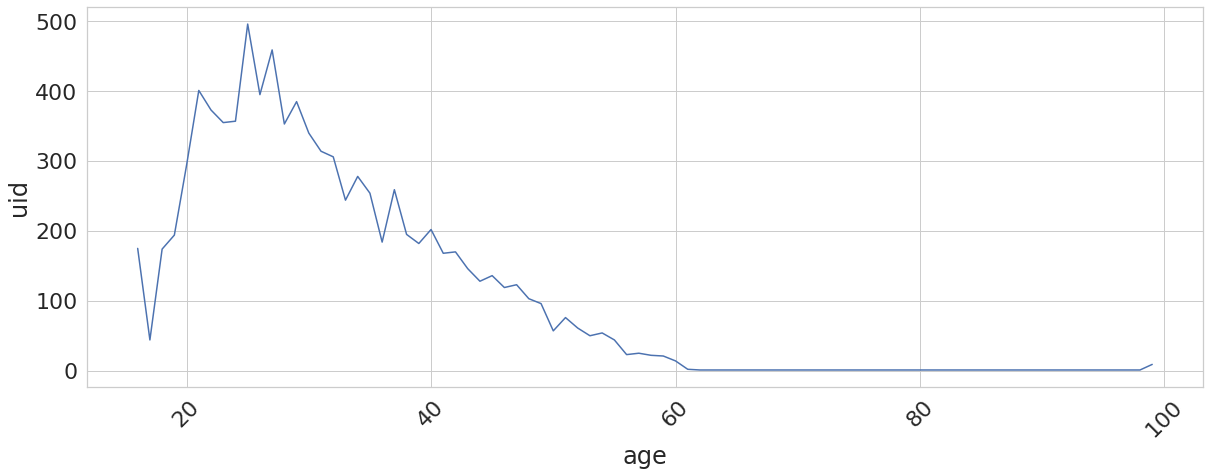

In [86]:
sns.lineplot(x="age", y="uid", data=df_age)
plt.xticks(rotation=45)
plt.show()

In [87]:
df_age.describe()

,age,uid
count,56.000000,56.000000
mean,45.696429,158.375000
std,20.635292,143.222721
min,16.000000,1.000000
25%,29.750000,22.750000
50%,43.500000,132.000000
75%,57.250000,263.750000
max,99.000000,496.000000


In [88]:
# возьмем возрастные промежутки по квантилям: 16-29, 30-43, 44-57, 58-99, присвоим пользователям кластеры

In [89]:
cluster = []

In [90]:
for i in df.age:
    if i < 30:
        cluster.append('16-29')
    elif i > 29 and i < 44:
        cluster.append('30-43')
    elif i > 43 and i < 58:
        cluster.append('44-57')
    else:
        cluster.append('58-99')

In [91]:
df['cluster'] = cluster

In [92]:
age16_1 = df.query('cluster == "16-29" & test_x == "test"').total_revenue

In [93]:
age16_2 = df.query('cluster == "16-29" & test_x == "control1"').total_revenue

In [94]:
age16_3 = df.query('cluster == "16-29" & test_x == "control2"').total_revenue

In [95]:
stats.levene(age16_1, age16_2, age16_3)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны

LeveneResult(statistic=1.340582488924303, pvalue=0.26179880872130107)

In [96]:
print(ss.shapiro(age16_1))
print(ss.shapiro(age16_2))
print(ss.shapiro(age16_3))
# p < 0.05, отвергаем нулевую гипотезу о том, что распределения нормальны, возвращаемся к Краскелу-Уоллису

ShapiroResult(statistic=0.07908540964126587, pvalue=0.0)
ShapiroResult(statistic=0.15463483333587646, pvalue=0.0)
ShapiroResult(statistic=0.17093908786773682, pvalue=0.0)


In [97]:
age16_1_log = np.log(df.query('cluster == "16-29" & test_x == "test" & total_revenue != 0').total_revenue)

In [98]:
age16_2_log = np.log(df.query('cluster == "16-29" & test_x == "control1" & total_revenue != 0').total_revenue)

In [99]:
age16_3_log = np.log(df.query('cluster == "16-29" & test_x == "control2" & total_revenue != 0').total_revenue)

In [100]:
stats.levene(age16_1_log, age16_2_log, age16_3_log)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны, трансформация не помогла

LeveneResult(statistic=0.3670609242301552, pvalue=0.6933798111117124)

In [101]:
ss.kruskal(age16_1, age16_2, age16_3)
# p < 0.05, отклоняем нулевую гипотезу об отсутствии статистически значимых различий: 
# минимум две группы имеют статистически значимые различия
# используем Dunn’s test с поправкой, чтобы выяснить, какие это группы и избежать ошибки первого рода

KruskalResult(statistic=9.216901635172963, pvalue=0.009967247437936184)

In [102]:
age16 = [age16_1, age16_2, age16_3]

In [103]:
sp.posthoc_dunn(age16, p_adjust='holm')
# p < 0.05 для сравнения 1 и 2, следовательно статистически значимы различия между 1 контрольной и тестовой группой

,1,2,3
1,1.000000,0.00772,0.143687
2,0.007720,1.00000,0.224740
3,0.143687,0.22474,1.000000


In [104]:
# посмотрим на средний чек

In [105]:
df.query('cluster == "16-29"') \
    .groupby('test_x').total_revenue.sum() / df.query('cluster == "16-29"').groupby('test_x').uid.nunique()
# в тестовой группе средний чек выше, чем в первой контрольной группе

test_x
control1    547.238520
control2    342.122380
test        499.612069
dtype: float64

In [106]:
(1861.624090 - 1322.317255) / 1322.317255 * 100
# на 40 процентов

40.784980530258615

Удалось поднять средний чек на 40 процентов в молодой возрастной группе

In [107]:
age34_1 = df.query('cluster == "30-43" & test_x == "test"').total_revenue

In [108]:
age34_2 = df.query('cluster == "30-43" & test_x == "control2"').total_revenue

In [109]:
age34_3 = df.query('cluster == "30-43" & test_x == "control1"').total_revenue

In [110]:
stats.levene(age34_1, age34_2, age34_3)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны

LeveneResult(statistic=1.3236555016038987, pvalue=0.26630450514360504)

In [111]:
print(ss.shapiro(age34_1))
print(ss.shapiro(age34_2))
print(ss.shapiro(age34_3))
# p < 0.05, отвергаем нулевую гипотезу о том, что распределения нормальны

ShapiroResult(statistic=0.1358577013015747, pvalue=0.0)
ShapiroResult(statistic=0.1026725172996521, pvalue=0.0)
ShapiroResult(statistic=0.13523584604263306, pvalue=0.0)


In [112]:
age34_1_log = np.log(df.query('cluster == "30-43" & test_x == "test" & total_revenue != 0').total_revenue)

In [113]:
age34_2_log = np.log(df.query('cluster == "30-43" & test_x == "control2" & total_revenue != 0').total_revenue)

In [114]:
age34_3_log = np.log(df.query('cluster == "30-43" & test_x == "control1" & total_revenue != 0').total_revenue)

In [115]:
stats.levene(age34_1_log, age34_2_log, age34_3_log)
# p > 0.05, принимаем нулевую гипотезу: дисперсии гомогенны

LeveneResult(statistic=2.0172642809759003, pvalue=0.13867747353334806)

In [116]:
print(ss.shapiro(age34_1_log))
print(ss.shapiro(age34_2_log))
print(ss.shapiro(age34_3_log))
# p < 0.05, отвергаем нулевую гипотезу о том, что распределения нормальны

ShapiroResult(statistic=0.8975176215171814, pvalue=0.0021706067491322756)
ShapiroResult(statistic=0.9337396025657654, pvalue=0.049829427152872086)
ShapiroResult(statistic=0.9727112650871277, pvalue=0.6548376679420471)


In [117]:
ss.kruskal(age34_1, age34_2, age34_3)
# p > 0.05, принимаем нулевую гипотезу о равенстве средних

KruskalResult(statistic=2.0596537217263817, pvalue=0.35706877779747154)

In [118]:
age51_1 = df.query('cluster == "44-57" & test_x == "test"').total_revenue

In [119]:
age51_2 = df.query('cluster == "44-57" & test_x == "control1"').total_revenue

In [120]:
age51_3 = df.query('cluster == "44-57" & test_x == "control2"').total_revenue

In [121]:
stats.levene(age51_1, age51_2, age51_3)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны

LeveneResult(statistic=0.21241397173356363, pvalue=0.8086632816774854)

In [122]:
age51_1_log = np.log(df.query('cluster == "44-57" & test_x == "test" & total_revenue != 0').total_revenue)

In [123]:
age51_2_log = np.log(df.query('cluster == "44-57" & test_x == "control1" & total_revenue != 0').total_revenue)

In [124]:
age51_3_log = np.log(df.query('cluster == "44-57" & test_x == "control2" & total_revenue != 0').total_revenue)

In [125]:
stats.levene(age51_1_log, age51_2_log, age51_3_log)
# p > 0.05, принимаем нулевую гипотезу: дисперсии гомогенны

LeveneResult(statistic=0.8633743660372478, pvalue=0.4307766602529225)

In [126]:
print(ss.shapiro(age51_1_log))
print(ss.shapiro(age51_2_log))
print(ss.shapiro(age51_3_log))
# p < 0.05, отвергаем нулевую гипотезу о том, что распределения нормальны
# трансформация не помогла, возвращаемся к Краскелу-Уоллису

ShapiroResult(statistic=0.9331552982330322, pvalue=0.5452271699905396)
ShapiroResult(statistic=0.9376504421234131, pvalue=0.321223646402359)
ShapiroResult(statistic=0.9848290085792542, pvalue=0.9951350092887878)


In [127]:
ss.kruskal(age51_1, age51_2, age51_3)
# p < 0.05, отвергаем нулевую гипотезу о равенстве средних

KruskalResult(statistic=2.0809864229124977, pvalue=0.35328039704356484)

In [128]:
age51 = [age51_1, age51_2, age51_3]

In [129]:
sp.posthoc_dunn(age51, p_adjust='holm')
# p < 0.05 для сравнения 1 и 3, статистически значимы различия между тестовой и второй контрольной группой

,1,2,3
1,1.000000,0.504259,0.572482
2,0.504259,1.000000,0.778370
3,0.572482,0.778370,1.000000


In [130]:
# посмотрим на средний чек

In [131]:
df.query('cluster == "44-57"') \
    .groupby('test_x').total_revenue.sum() / df.query('cluster == "44-57"').groupby('test_x').uid.nunique()
# в тестовой группе средний чек ниже, чем во второй контрольной группе
# в этой группе увеличение стоимости подписки значения не имеет

test_x
control1    429.935733
control2    449.040115
test        341.022409
dtype: float64

In [132]:
age68_1 = df.query('cluster == "58-99" & test_x == "test"').total_revenue

In [133]:
age68_2 = df.query('cluster == "58-99" & test_x == "control1"').total_revenue

In [134]:
age68_3 = df.query('cluster == "58-99" & test_x == "control2"').total_revenue

In [135]:
stats.levene(age68_1, age68_2, age68_3)
# p < 0.05, отклоняем нулевую гипотезу о гомогенности дисперсий: дисперсии гетерогенны

LeveneResult(statistic=3.9242424242424256, pvalue=0.02399826200984763)

In [136]:
age68_1_log = np.log(df.query('cluster == "58-99" & test_x == "test" & total_revenue != 0').total_revenue)

In [137]:
age68_1_log = np.log(df.query('cluster == "58-99" & test_x == "control1" & total_revenue != 0').total_revenue)

In [138]:
age68_1_log = np.log(df.query('cluster == "58-99" & test_x == "control2" & total_revenue != 0').total_revenue)

In [139]:
stats.levene(age68_1_log, age68_1_log, age68_1_log)
# трансформация не сработала - просто выборки маленькие

/opt/tljh/user/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/tljh/user/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [140]:
ss.kruskal(age68_1, age68_2, age68_3)
# p < 0.05, отвергаем нулевую гипотезу о равенстве средних

KruskalResult(statistic=7.287671232876638, pvalue=0.026151842908595957)

In [141]:
age68 = [age68_1, age68_2, age68_3]

In [142]:
sp.posthoc_dunn(age68, p_adjust='holm')
# p < 0.05 для сравнения 1 и 2,3, статистически значимы различия между каждой из контрольных и тестовой группой

,1,2,3
1,1.000000,0.057863,0.04736
2,0.057863,1.000000,1.00000
3,0.047360,1.000000,1.00000


In [143]:
# посмотрим на ARPU
df.query('cluster == "58-99"') \
    .groupby('test_x').total_revenue.sum() / df.query('cluster == "58-99"').groupby('test_x').uid.nunique()
# в тестовой группе средний чек выше, чем в первой контрольной группе

test_x
control1       0.00
control2       0.00
test        7558.72
dtype: float64

Итого: изучили возрастные группы и выяснили, что тест был успешен на пользователя младшей (16-29) и старшей (58-99) группах

4. Выводы: сколько денег заработаем дополнительно

In [144]:
df.query('cluster == "16-29"') \
    .groupby('test_x').total_revenue.sum() / df.query('cluster == "16-29"').groupby('test_x').uid.nunique()

test_x
control1    547.238520
control2    342.122380
test        499.612069
dtype: float64

In [145]:
df.query('cluster == "16-29"').groupby('test_x').uid.nunique()

test_x
control1    1459
control2    1479
test        1508
Name: uid, dtype: int64

In [146]:
df.query('cluster == "16-29"').total_revenue.sum() 
# столько заработали на возрастах 16-29

2057835

In [147]:
(1472 + 1495 + 1511) * 1861.624090
# столько могли бы заработать за этот период

8336352.67502

In [148]:
df.query('cluster == "58-99"') \
    .groupby('test_x').total_revenue.sum() / df.query('cluster == "58-99"').groupby('test_x').uid.nunique()

test_x
control1       0.00
control2       0.00
test        7558.72
dtype: float64

In [149]:
df.query('cluster == "58-99"').groupby('test_x').uid.nunique()

test_x
control1    20
control2    29
test        25
Name: uid, dtype: int64

In [150]:
df.query('cluster == "58-99"').total_revenue.sum() 
# столько заработали на возрастах 58-99

188968

In [151]:
(21 + 25) * 17007.120000
# столько могли бы заработать за этот период

782327.5199999999

In [152]:
(8336352.67502 - 5843981) + (782327.5199999999 - 428220)

2846479.19502

In [153]:
2846479.19502 / 6802523 * 100
# 6 802 523 - всего заработали сейчас, а могли бы на 42 процента больше

41.84446263570149

Итог: повышение подписки имеет смысл на пользователях младшей (16-29) и старшей (58-99) группах, в других группах пользователей эксперимент не показал значимых результатов. Если введем это изменение, сможем добиться увеличения валовой выручки на 42 процента